In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import csv
dataset="weatherAUS.csv"
dataset = pd.read_csv(dataset)
df=pd.DataFrame(dataset)

***PreProcessing***

In [ ]:
df['RainToday']=df['RainToday'].fillna('No')
df['RainTomorrow']=df['RainTomorrow'].fillna('No')
df['WindDir9am']=df['WindDir9am'].astype(str)
df['WindDir3pm']=df['WindDir3pm'].astype(str)
df['WindGustDir']=df['WindGustDir'].astype(str)

In [ ]:
print(df.isna().sum().sum())
df2=df.fillna(0)
print(df2.isna().sum().sum())
df2=df2.drop(axis=1,columns=['Date'])

215769
0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# define label encoding
encoder = LabelEncoder()
#df2=pd.get_dummies(df2, columns=["url"])
df2['Location'] = encoder.fit_transform(df2['Location'].values)
df2['WindGustDir'] = encoder.fit_transform(df2['WindGustDir'].values)
df2['WindDir9am'] = encoder.fit_transform(df2['WindDir9am'].values)
df2['WindDir3pm'] = encoder.fit_transform(df2['WindDir3pm'].values)
df2['RainTomorrow'] = encoder.fit_transform(df2['RainTomorrow'].values)
df2['RainToday'] = encoder.fit_transform(df2['RainToday'].values)
#droping rows for unseen data
x_unseen=df2.iloc[6396:6397,:-1]
df2=df2.drop(axis=0,index=[6396])
df2=df2.sample(n=100)
X= df2.iloc[:,:-1].values #features
y = df2.iloc[:,-1].values #labels

In [ ]:
df2.iloc[6396:6398,:]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
26804,21,8.5,16.9,0.0,0.0,0.0,11,39.0,12,12,17.0,11.0,50.0,43.0,0.0,0.0,0.0,0.0,12.3,16.3,0,0
8932,8,11.8,26.9,0.0,0.0,0.0,12,37.0,8,13,15.0,20.0,47.0,20.0,1014.5,1012.7,0.0,0.0,16.7,25.4,0,0


In [ ]:
#hold out method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# **Naive Bayes CLassification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
y_true, y_pred_NB,x_true = list(), list(),list()
for train_index, test_index in loo.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  model_NB= GaussianNB(priors=[0.5,0.5]) #prior probabilities of each class(clases/trget=0 or 1)
  model_NB.fit(x_train,y_train)
  yhat = model_NB.predict(x_test)
	# store
  x_true.append(x_test[0])
  y_true.append(y_test[0])
  y_pred_NB.append(yhat[0])
acc = accuracy_score(y_true, y_pred_NB)
print('Accuracy: %.3f' % acc)


LeaveOneOut()
Accuracy: 0.790


**Performance of Naive Bayes**

The accuracy is  79.0%
[[67 11]
 [10 12]]
              precision    recall  f1-score   support

     class 0       0.87      0.86      0.86        78
     class 1       0.52      0.55      0.53        22

    accuracy                           0.79       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.79      0.79      0.79       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


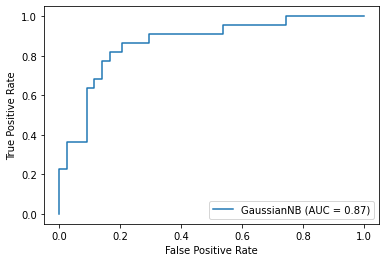

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("The accuracy is  "+str(accuracy_score(y_true,y_pred_NB)*100)+"%")
print(confusion_matrix(y_true, y_pred_NB))
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred_NB,target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_NB,pos_label=2)
metrics.plot_roc_curve(model_NB, x_true, y_true)
plt.show()

**Prediction on unseen Data**

In [ ]:
#prediction on Unseen data
#x_new=x_new.reshape(-1,1)
y_new = model_NB.predict(x_unseen)
print(y_new)

[0]


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
y_true, y_pred_LR,x_true = list(), list(),list()
for train_index, test_index in loo.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model_LogR= LogisticRegression(solver='liblinear', random_state=0)
  model_LogR.fit(x_train, y_train)
  yhat = model_NB.predict(x_test)
	# store
  x_true.append(x_test[0])
  y_true.append(y_test[0])
  y_pred_LR.append(yhat[0])
acc = accuracy_score(y_true, y_pred_LR)
print('Accuracy: %.3f' % acc)

LeaveOneOut()
Accuracy: 0.830


**performance of Logistic Regression**

The accuracy is  83.0%
[[69  9]
 [ 8 14]]
              precision    recall  f1-score   support

     class 0       0.90      0.88      0.89        78
     class 1       0.61      0.64      0.62        22

    accuracy                           0.83       100
   macro avg       0.75      0.76      0.76       100
weighted avg       0.83      0.83      0.83       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


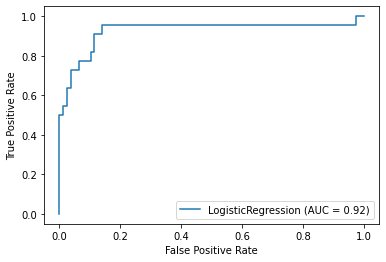

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("The accuracy is  "+str(accuracy_score(y_true,y_pred_LR)*100)+"%")
print(confusion_matrix(y_true, y_pred_LR))
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred_LR,target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_LR,pos_label=2)
metrics.plot_roc_curve(model_LogR, x_true, y_true)
plt.show() 

**prediction on unseen data**

In [ ]:
#prediction on unseen data
#x_new=x_new.reshape(-1,1)
y_new = model2.predict(x_unseen)
print(y_new)

[0]


# **KNN CLassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
y_true, y_pred_knn,x_true = list(), list(),list()
for train_index, test_index in loo.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model_knn = KNeighborsClassifier(n_neighbors=6)  #it calculates the distace of row to be predicted from every other row. then sort and discard classes having distace more than 6
  model_knn.fit(x_train, y_train)
  yhat = model_knn.predict(x_test)
	# store
  x_true.append(x_test[0])
  y_true.append(y_test[0])
  y_pred_knn.append(yhat[0])
acc = accuracy_score(y_true, y_pred_knn)
print('Accuracy: %.3f' % acc)

LeaveOneOut()
Accuracy: 0.800


**Performance of KNN**

The accuracy is  80.0%
[[69  9]
 [ 8 14]]
              precision    recall  f1-score   support

     class 0       0.80      0.99      0.89        78
     class 1       0.75      0.14      0.23        22

    accuracy                           0.80       100
   macro avg       0.78      0.56      0.56       100
weighted avg       0.79      0.80      0.74       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


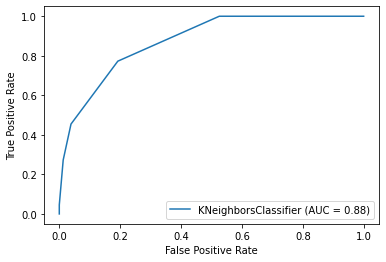

In [ ]:
#performance
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("The accuracy is  "+str(accuracy_score(y_true,y_pred_knn)*100)+"%")
print(confusion_matrix(y_true, y_pred_LR))
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred_knn,target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_knn,pos_label=2)
metrics.plot_roc_curve(model_knn, x_true, y_true)
plt.show() 

Prediction on unseen data

In [ ]:
#prediction on unseen data
#x_new=x_new.reshape(-1,1)
y_new = classifier.predict(x_unseen)
print(y_new)

[0]


Stacking involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

Stacking addresses the question:

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?
The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
 Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

In [ ]:
#ensemble Learning
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
y_true, y_pred_esm,x_true = list(), list(),list()
for train_index, test_index in loo.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)
  models = [('model_LogR',LogisticRegression()),('model_NB',GaussianNB()),('model_knn',KNeighborsClassifier())]
  clf= StackingClassifier(estimators=models,cv=None,final_estimator=LogisticRegression(max_iter=600,solver='lbfgs'))
  clf.fit(x_train, y_train)
  yhat = model_NB.predict(x_test)
  x_true.append(x_test[0])
  y_true.append(y_test[0])
  y_pred_esm.append(yhat[0])
acc = accuracy_score(y_true, y_pred_esm)
print('Accuracy: %.3f' % acc)

LeaveOneOut()
Accuracy: 0.830
